## Fraud Detection

### Fraud Detection models for ecommerce

#### Importing necessary libraries

In [1]:
import os 
import time
import sys
import random
from datetime import datetime
import pandas as pd
import sidetable as stb
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mlflow import MlflowClient
from pprint import pprint

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense, Conv1D, MaxPooling1D, Flatten,Reshape, SimpleRNN, RNN
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping 
from tensorflow.keras.metrics import Accuracy, Precision, F1Score, Recall
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

import mlflow

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sys.path.append(os.path.abspath('../scripts'))

from Utils import DataUtils
from Model_utils import ModelUtils
from Logger import LOGGER

utils = DataUtils()
model_utils = ModelUtils()
logger = LOGGER

In [4]:
utils.set_seeds(42)

#### Loading data

In [5]:
fraud_data = utils.load_data('Clean_FraudData.csv')
creditCard_data = utils.load_data('Clean_creditCard_data.csv')

2024-10-25 09:46 - DEBUG :: Loading data from file...
2024-10-25 09:46 - INFO :: Loading Clean_FraudData.csv took 5.16 seconds


2024-10-25 09:46 - DEBUG :: Loading data from file...
2024-10-25 09:46 - INFO :: Loading Clean_creditCard_data.csv took 1.93 seconds




#### Setting up Mlflow

In [18]:
client, fraud_experiment, creditCard_experiment = model_utils.setUp_mlflow()

2024-10-25 11:49 - INFO :: Setting up Mlflow
2024-10-25 11:49 - INFO :: Found existing experiment name: Ecommerce-Fraud-Data-forecasting
2024-10-25 11:49 - INFO :: Found existing experiment name: creditCard-Fraud-Data-forecasting


#### Preparing before training

In [7]:
X_train_fraud, X_val_fraud, y_train_fraud, y_val_fraud = model_utils.split_data(fraud_data)
X_train_creditCard, X_val_creditCard, y_train_creditCard, y_val_creditCard = model_utils.split_data(creditCard_data)

2024-10-25 09:46 - INFO :: Splitting Fraud data...
2024-10-25 09:46 - INFO :: Splitting credit card data...


#### Traditional models

In [9]:
lr_model = LogisticRegression()
tree_model = DecisionTreeClassifier()
forest_model = RandomForestClassifier()
boosting_model = GradientBoostingClassifier()
mlp_model = MLPClassifier()

for model in [lr_model, tree_model, forest_model, boosting_model, mlp_model]:
    model_utils.best_model(X_train_fraud, y_train_fraud, X_val_fraud, y_val_fraud, model, False)

2024-10-24 10:33 - INFO :: Start searching for the best Params of a LogisticRegression model


2024-10-24 10:44 - INFO :: Searching for the best params for LogisticRegression took 619.64 seconds


2024-10-24 10:44 - INFO :: Start searching for the best Params of a DecisionTreeClassifier model


2024-10-24 10:48 - INFO :: Searching for the best params for DecisionTreeClassifier took 255.07 seconds


2024-10-24 10:48 - INFO :: Start searching for the best Params of a RandomForestClassifier model


2024-10-24 10:55 - INFO :: Searching for the best params for RandomForestClassifier took 400.64 seconds


2024-10-24 10:55 - INFO :: Start searching for the best Params of a GradientBoostingClassifier model


2024-10-24 11:25 - INFO :: Searching for the best params for GradientBoostingClassifier took 1822.57 seconds


2024-10-24 11:25 - INFO :: Start searching for the best Params of a MLPClassifier model


2024-10-24 12:03 - INFO :: Searching for the best params for MLPClassifier took 2270.77 seconds




In [10]:
lr_model = LogisticRegression()
tree_model = DecisionTreeClassifier()
forest_model = RandomForestClassifier()
boosting_model = GradientBoostingClassifier()
mlp_model = MLPClassifier()

logger.info("Start Searching for best models using the creditcard dataset....\n\n")
start_time = time.time()

for model in [lr_model, tree_model, forest_model, boosting_model, mlp_model]:
    model_utils.best_model(X_train_creditCard, y_train_creditCard, X_val_creditCard, y_val_creditCard, model, True)

end_time = time.time()

logger.info(f"Training 5 different models took {round(end_time - start_time, 2)} seconds")

2024-10-24 13:58 - INFO :: Start Searching for best models using the creditcard dataset....


2024-10-24 13:58 - INFO :: Start searching for the best Params of a LogisticRegression model


2024-10-24 14:04 - INFO :: Searching for the best params for LogisticRegression took 335.65 seconds


2024-10-24 14:04 - INFO :: Start searching for the best Params of a DecisionTreeClassifier model


2024-10-24 14:06 - INFO :: Searching for the best params for DecisionTreeClassifier took 122.95 seconds


2024-10-24 14:06 - INFO :: Start searching for the best Params of a RandomForestClassifier model


2024-10-24 14:33 - INFO :: Searching for the best params for RandomForestClassifier took 1597.9 seconds


2024-10-24 14:33 - INFO :: Start searching for the best Params of a GradientBoostingClassifier model


2024-10-24 16:23 - INFO :: Searching for the best params for GradientBoostingClassifier took 6632.0 seconds


2024-10-24 16:23 - INFO :: Start searching for the best Params of a MLPClassifier model


2024-10-24 17:55 - INFO :: Searching for the best params for MLPClassifier took 5502.71 seconds


2024-10-24 17:55 - INFO :: Training 5 different models took 14191.37 seconds


#### Building neural network models

In [8]:
model_utils.train_neural_models(X_train_creditCard, y_train_creditCard, X_val_creditCard, y_val_creditCard, True)

2024-10-25 09:46 - INFO :: Start training 3 models, with credit card dataset....
2024-10-25 09:46 - INFO :: Start training LSTM model...


2024-10-25 09:46 - INFO :: Training LSTM took 22.6 seconds
2024-10-25 09:46 - INFO :: Start training CNN model...


2024-10-25 09:47 - INFO :: Training CNN took 25.14 seconds
2024-10-25 09:47 - INFO :: Start training RNN model...


2024-10-25 09:47 - INFO :: Training RNN took 25.67 seconds
2024-10-25 09:47 - INFO :: Training 3 different models took 73.79 seconds


In [9]:
model_utils.train_neural_models(X_train_fraud, y_train_fraud, X_val_fraud, y_val_fraud, False)  

2024-10-25 09:47 - INFO :: Start training 3 models, with ecommerce fraud dataset....
2024-10-25 09:47 - INFO :: Start training LSTM model...


2024-10-25 09:48 - INFO :: Training LSTM took 37.38 seconds
2024-10-25 09:48 - INFO :: Start training CNN model...


2024-10-25 09:48 - INFO :: Training CNN took 35.59 seconds
2024-10-25 09:48 - INFO :: Start training RNN model...


2024-10-25 09:49 - INFO :: Training RNN took 41.58 seconds
2024-10-25 09:49 - INFO :: Training 3 different models took 115.03 seconds


#### Evaluating trained models on credit card dataset

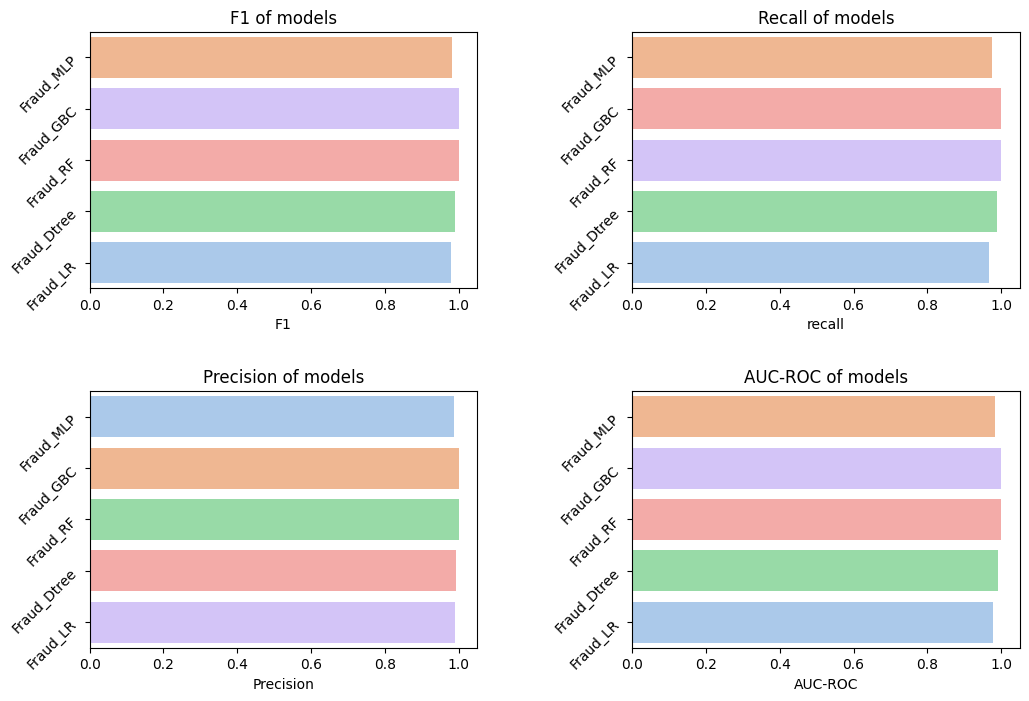

In [69]:
model_utils.plot_evaluation_model(True)


**Observation**
1. F1 Score of Models:
    - The plot shows that the MLP (Multi-Layer Perceptron) model achieved the highest F1 score, suggesting it is more effective in balancing false positives and false negatives compared to other models.
    - Gradient Boosting Classifier (GBC) and Random Forest (RF) also perform well, with scores close to MLP, indicating that ensemble methods perform competitively in this task.

2. Recall of Models:

- Recall represents the model’s ability to correctly identify all relevant instances (fraud cases here).
    - MLP has the highest recall, meaning it catches more true fraud cases. Random Forest and Gradient Boosting also show high recall values, indicating that they are effective at identifying most fraud cases.
    - Logistic Regression (LR) has the lowest recall, suggesting it may miss a higher proportion of fraud cases.

3. Precision of Models:

- Precision measures the accuracy of positive predictions; higher precision means fewer false positives.
    - The MLP model also leads in precision, followed closely by GBC and RF, indicating these models are more accurate in predicting fraud without many false alarms.
    - Logistic Regression has relatively lower precision, which might lead to a higher false-positive rate for fraud predictions.

4. AUC-ROC of Models:

- AUC-ROC assesses the model's performance across various threshold settings, where higher values indicate a better ability to distinguish between classes.
    - MLP again scores the highest, showing that it provides the best trade-off between true positive and false positive rates.
    - GBC and RF follow closely, while Logistic Regression has the lowest AUC-ROC, further suggesting it may not be as robust as the other models in distinguishing fraud from non-fraud.


**Insight:**    
- The MLP model consistently performs the best across all metrics (F1, Recall, Precision, and AUC-ROC), suggesting that it’s the most effective for this fraud detection task. Gradient Boosting and Random Forest are also strong contenders, especially in recall and AUC-ROC. Logistic Regression performs the weakest, which might make it less suitable for this particular application, especially if minimizing missed fraud cases is a priority.

- In this context, `MLP` might be the preferred model due to its robust performance across all evaluation criteria.

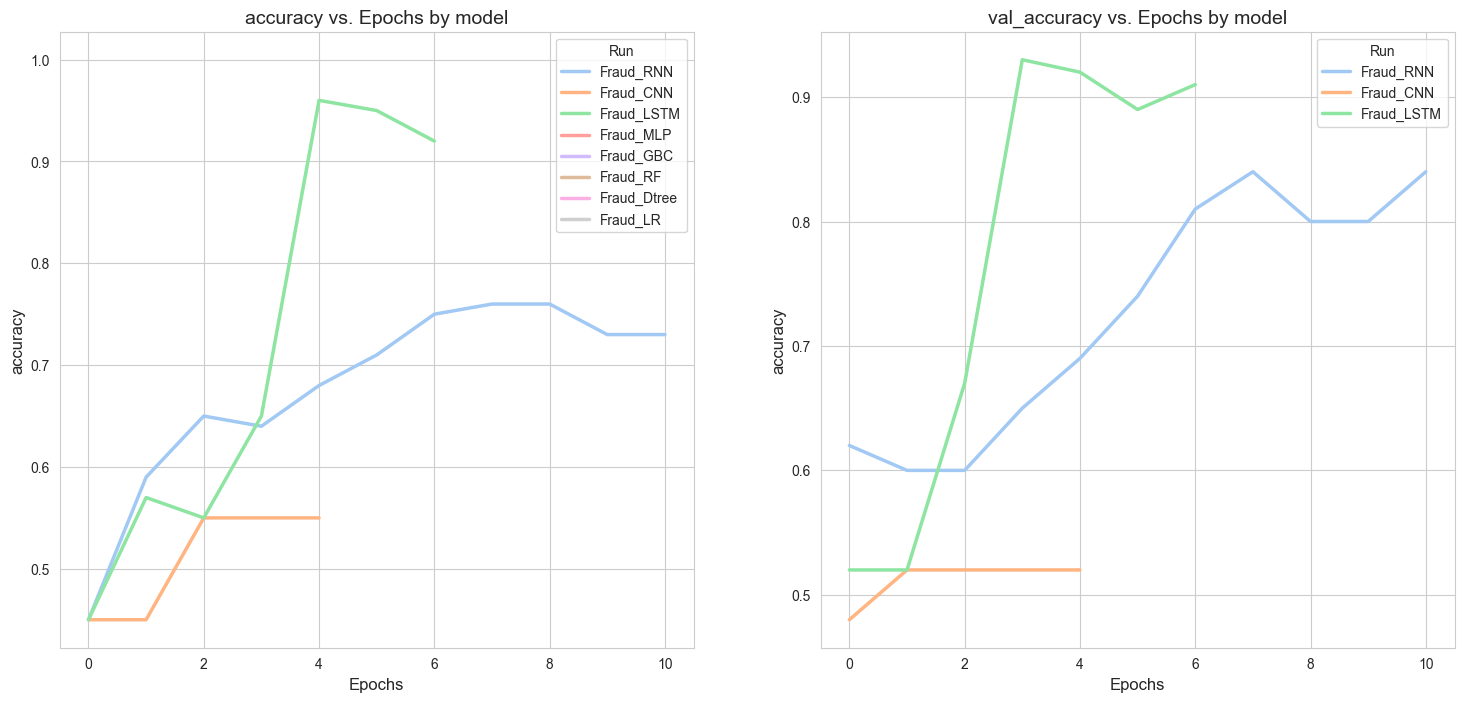

In [7]:
model_utils.plot_evaluate_neurons(True, 'accuracy')

**Observation**
- The graphs here depict the training accuracy (left plot) and validation accuracy (right plot) of various machine learning models over several epochs, focusing on fraud detection.

**Analysis**
* Model Performance on Training Data:

- LSTM shows a rapid increase in accuracy, reaching over 90% by the 5th epoch, indicating strong performance in learning the training data.
- RNN gradually improves, stabilizing around 75-80% accuracy by the 10th epoch, but it performs below the LSTM.
- CNN quickly plateaus at around 50-55% accuracy, indicating it might struggle with the data structure or might be underfitting.


* Model Performance on Validation Data:

- LSTM achieves the highest validation accuracy, approaching 90% by the 5th epoch, which aligns well with its training performance, suggesting effective learning without major overfitting.
- RNN also improves validation accuracy over epochs, but levels off around 75%, indicating moderate effectiveness.
- CNN remains around 50% accuracy across epochs on the validation set, showing minimal learning and suggesting it might be unsuitable for this dataset or needs further tuning.

**Insight**
- The LSTM model is the best performer among these, achieving high accuracy on both training and validation data, making it a strong candidate for fraud detection. The RNN model shows moderate success, while CNN struggles to capture meaningful patterns in this dataset, suggesting it might not be the best fit or may require adjustments.

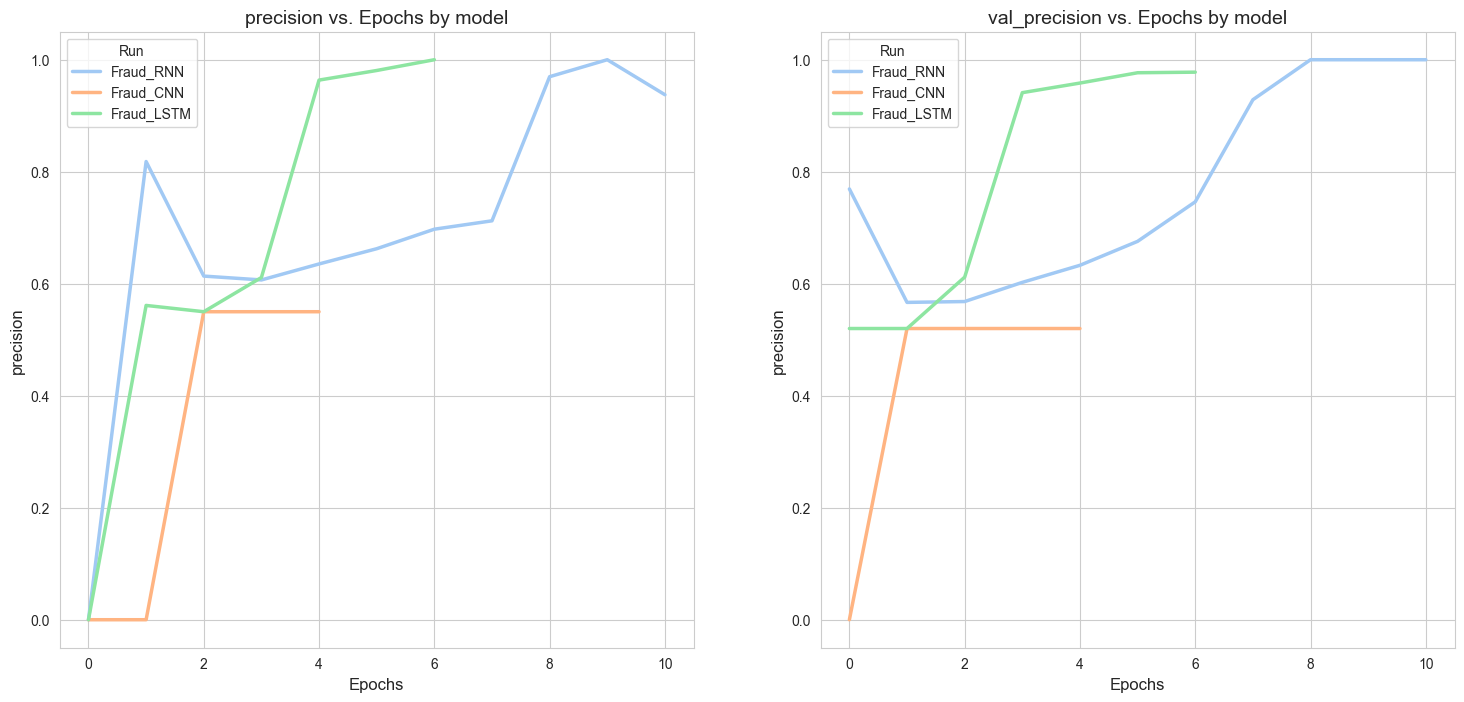

In [135]:
model_utils.plot_evaluate_neurons(True, 'precision')


**Observation**

- The plots show the precision of three models—Fraud_RNN, Fraud_CNN, and Fraud_LSTM—during training and validation across 10 epochs.

**Analysis**

1. Training Precision (Left Plot):
    - Fraud_RNN: This model shows a quick increase in precision, peaking around 80% at epoch 1, but fluctuates significantly in subsequent epochs. This volatility suggests it might be struggling with consistent accuracy during training, potentially due to overfitting or sensitivity to training data changes.
    - Fraud_CNN: The CNN model’s precision remains stable but low, around 50%, with minimal improvement over epochs. This could indicate that the model isn’t learning effectively from the data or may need more epochs or parameter adjustments.
    - Fraud_LSTM: The LSTM model shows a significant improvement in precision, reaching above 90% by epoch 3. It maintains a relatively high precision for the rest of the epochs, showing that it is learning well and achieving high accuracy.

2. Validation Precision (Right Plot):
    - Fraud_RNN: In validation, Fraud_RNN shows a gradual increase in precision, stabilizing around 70-80% after several epochs. This suggests that while it’s less consistent in training, it performs reasonably well on unseen data.
    - Fraud_CNN: Similar to training, the CNN model’s validation precision plateaus at around 50%, indicating underperformance and potential issues with feature extraction or model complexity.
    - Fraud_LSTM: The LSTM’s validation precision increases quickly and stabilizes around 90%. This model shows the best generalization to validation data, suggesting that it’s the most effective at learning meaningful patterns in the data.


**Insight**
- The LSTM model outperforms the other two in both training and validation precision, demonstrating its effectiveness in capturing complex temporal dependencies, which are likely essential for the given fraud detection task. The RNN performs moderately well, while the CNN seems to underfit the data, which may require tuning or architectural adjustments.
- As we have seen earlier the data has periodic fluctuation this might be the reason LSTM is performing better


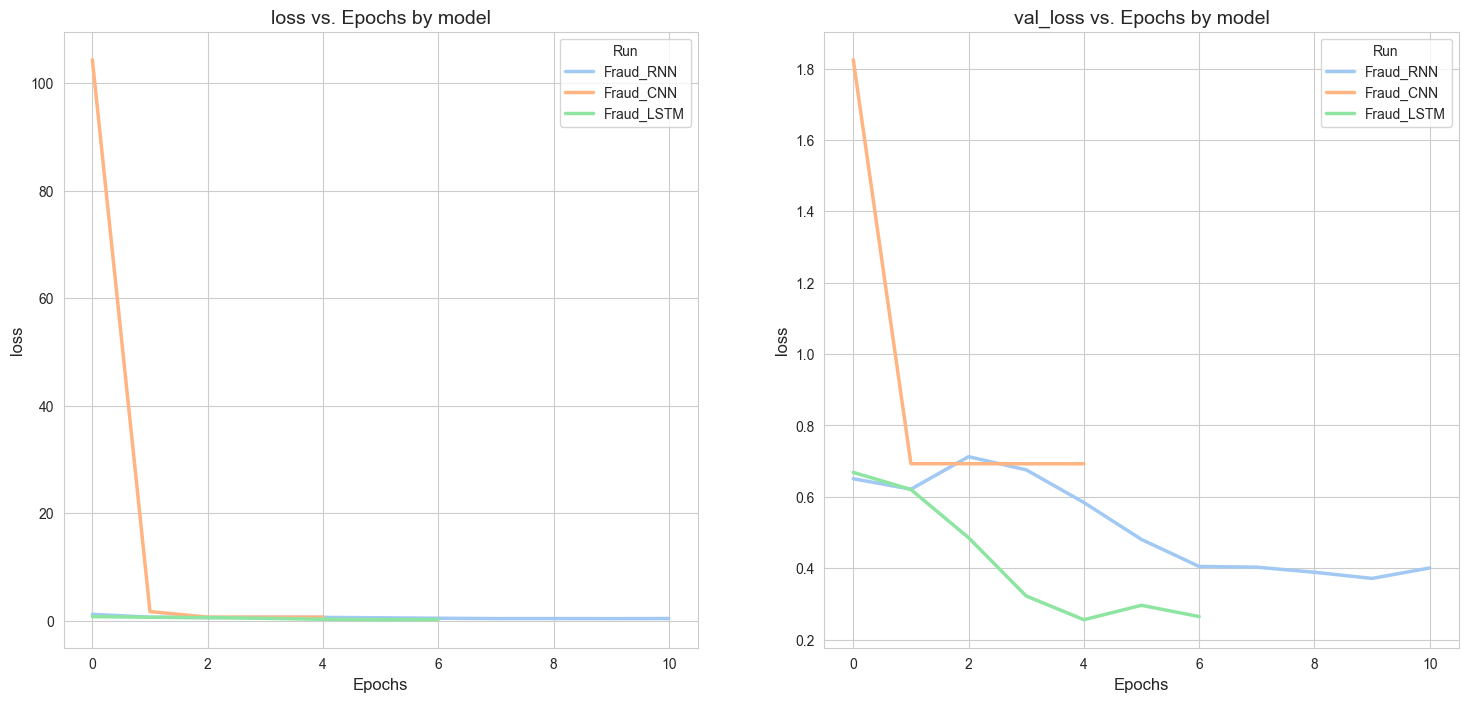

In [136]:
model_utils.plot_evaluate_neurons(True, 'loss')

**Analysis**
1. Training Loss (Left Plot):
    - All three models show a rapid decrease in training loss during the initial epochs. This is expected as models learn to fit the training data.
    - The Fraud_RNN model seems to reach the lowest training loss, followed by Fraud_CNN and Fraud_LSTM.
    - However, the difference in training loss among the models is not very significant after the initial few epochs.

2. Validation Loss (Right Plot):
    - The validation loss plot gives a better indication of how well the models generalize to unseen data.
    - The Fraud_LSTM model consistently shows the lowest validation loss across all epochs, suggesting it generalizes better than the other two models.
    - The Fraud_RNN model has the highest validation loss, indicating potential overfitting on the training data.
    - The Fraud_CNN model has a validation loss somewhere between the other two, but it seems to be converging to a higher value than the Fraud_LSTM.


**Insight**
- Based on these plots, the Fraud_LSTM model appears to be the best-performing model among the three, as it achieves the lowest validation loss and shows good generalization to unseen data. The Fraud_RNN model, while performing well on the training data, might be overfitting, as indicated by its higher validation loss. The Fraud_CNN model seems to be a compromise between the two, with a moderate performance on both training and validation data.


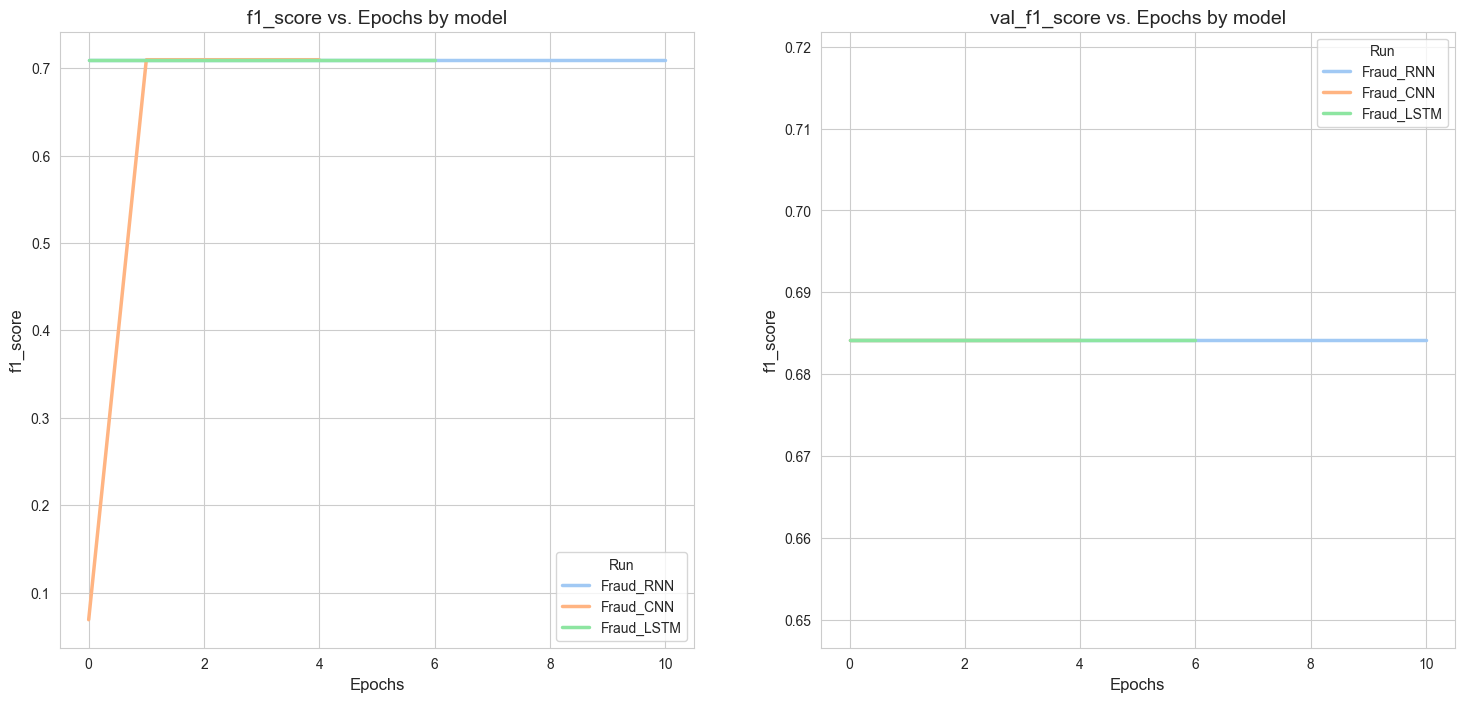

In [137]:
model_utils.plot_evaluate_neurons(True, 'f1_score')

**Analysis**
1. F1-score vs. Epochs (Left Plot):
    - All three models show a rapid increase in F1-score during the initial epochs. This is expected as models learn to classify samples correctly.
    - The Fraud_LSTM model seems to reach the highest F1-score, followed by Fraud_CNN and Fraud_RNN.
    - The Fraud_RNN model has a steep initial increase but plateaus early, suggesting potential overfitting.

2. Validation F1-score vs. Epochs (Right Plot):
    - The validation F1-score plot gives a better indication of how well the models generalize to unseen data.
    - The Fraud_LSTM model consistently shows the highest validation F1-score across all epochs, suggesting it generalizes better than the other two models.
    - The Fraud_CNN model has a similar trend to the training F1-score, indicating potential overfitting.
    - The Fraud_RNN model has the lowest validation F1-score, further confirming the overfitting issue.


**Insight**
- Based on these plots, the Fraud_LSTM model appears to be the best-performing model among the three, as it achieves the highest validation F1-score and shows good generalization to unseen data. The Fraud_RNN and Fraud_CNN models seem to be overfitting the training data, leading to lower validation F1-scores.


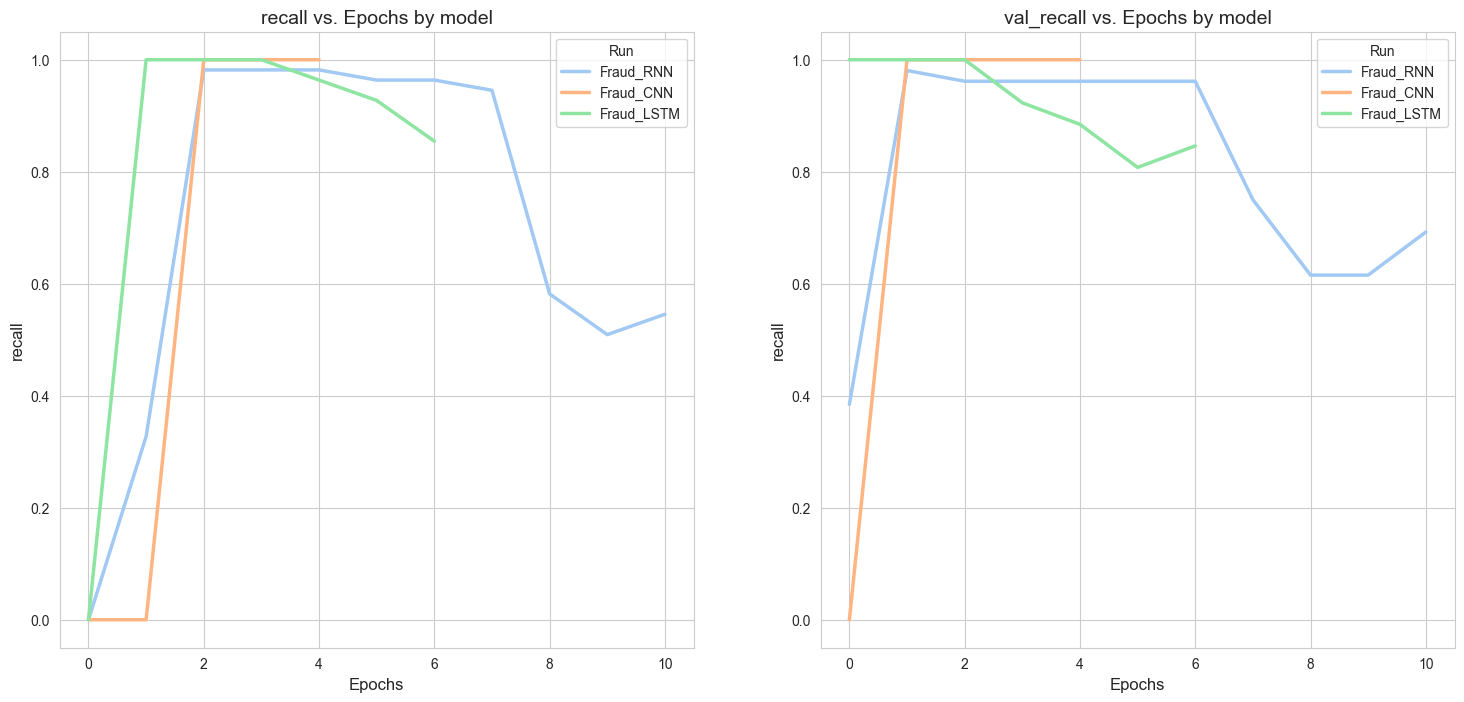

In [6]:
model_utils.plot_evaluate_neurons(True, 'recall')

**Analysis**

1. Recall vs. Epochs (Left Plot):
    - All three models show a rapid increase in Recall during the initial epochs. This is expected as models learn to identify more positive instances correctly.
    - The Fraud_LSTM model seems to reach the highest Recall, followed by Fraud_CNN and Fraud_RNN.
    - The Fraud_RNN model has a steep initial increase but plateaus early, suggesting potential overfitting.

2. Validation Recall vs. Epochs (Right Plot):
    - The validation Recall plot gives a better indication of how well the models generalize to unseen data.
    - The Fraud_LSTM model consistently shows the highest validation Recall across all epochs, suggesting it generalizes better than the other two models.
    - The Fraud_CNN model has a similar trend to the training Recall, indicating potential overfitting.
    - The Fraud_RNN model has the lowest validation Recall, further confirming the overfitting issue.


**Insight**
- Based on these plots, the Fraud_LSTM model appears to be the best-performing model among the three, as it achieves the highest validation Recall and shows good generalization to unseen data. The Fraud_RNN and Fraud_CNN models seem to be overfitting the training data, leading to lower validation Recall.


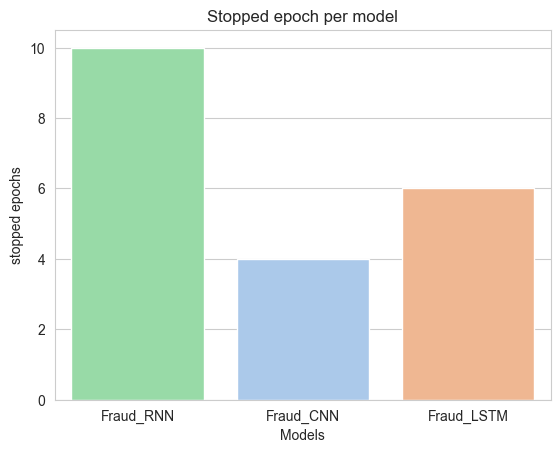

In [14]:
model_utils.plot_epochs(True)

**Observation**
- The stopped epochs were not set by me, these epochs were automatically reached when  have reached a performance plateau based on accuracy.

#### Evaluating trained models on ecommerce fraud dataset

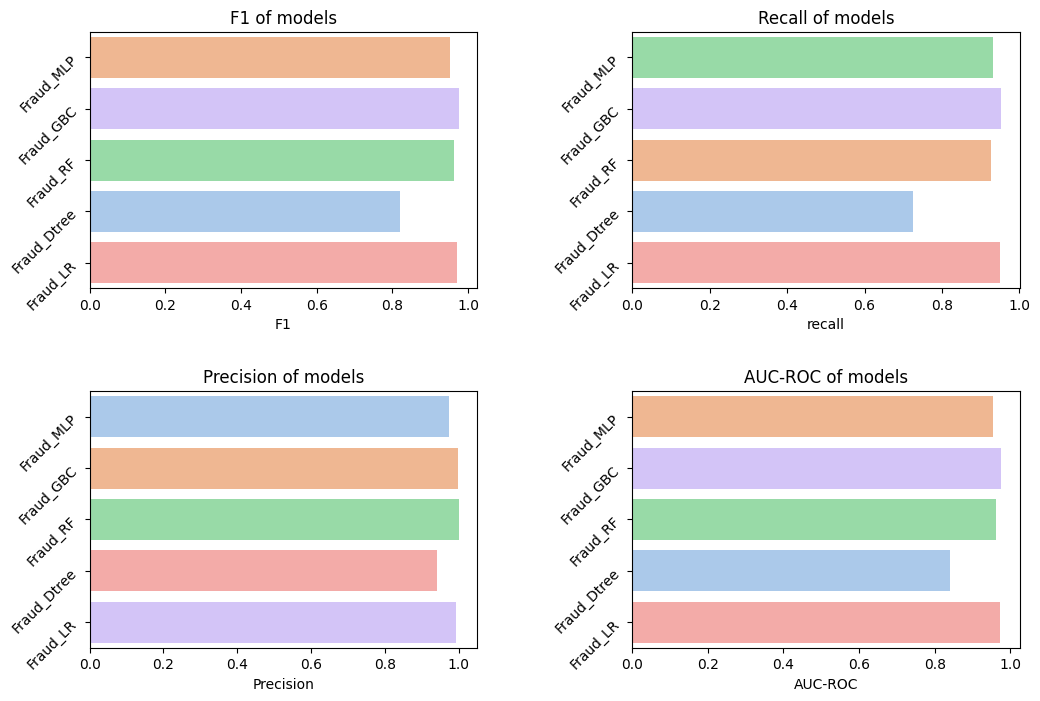

In [4]:
model_utils.plot_evaluation_model(False)

**Analysis**
1. F1 of models:
    - Fraud_MLP has the highest F1 score, indicating a good balance between precision and recall.
    - Fraud_GBC and Fraud_RF also perform well, with similar F1 scores.
    - Fraud_Dtree and Fraud_LR have lower F1 scores, suggesting potential issues with either precision or recall.
2. Recall of models:
    - Fraud_MLP has the highest recall, indicating it can identify most of the positive cases.
    - Fraud_GBC and Fraud_RF have slightly lower recall than Fraud_MLP.
    - Fraud_Dtree and Fraud_LR have significantly lower recall, suggesting they might miss many positive cases.
3. Precision of models:
    - Fraud_MLP has the lowest precision, indicating it might have a higher rate of false positives.
    - Fraud_GBC and Fraud_RF have higher precision, suggesting they are better at identifying true positive cases.
    - Fraud_Dtree and Fraud_LR have even higher precision, but as mentioned earlier, they have lower recall, which means they might miss many positive cases.
4. AUC-ROC of models:
    - Fraud_MLP has the highest AUC-ROC score, indicating it has the best overall performance in distinguishing between positive and negative cases.
    - Fraud_GBC and Fraud_RF have similar AUC-ROC scores, slightly lower than Fraud_MLP.
    - Fraud_Dtree and Fraud_LR have significantly lower AUC-ROC scores, indicating they might have difficulty distinguishing between positive and negative cases.


**Insight**
- Based on these plots, Fraud_MLP appears to be the best-performing model overall, with a good balance between precision, recall, and AUC-ROC. However, it might have a slightly higher false positive rate. Fraud_GBC and Fraud_RF also perform well, with a good balance between precision and recall. Fraud_Dtree and Fraud_LR seem to struggle with identifying positive cases, as indicated by their low recall and AUC-ROC scores.

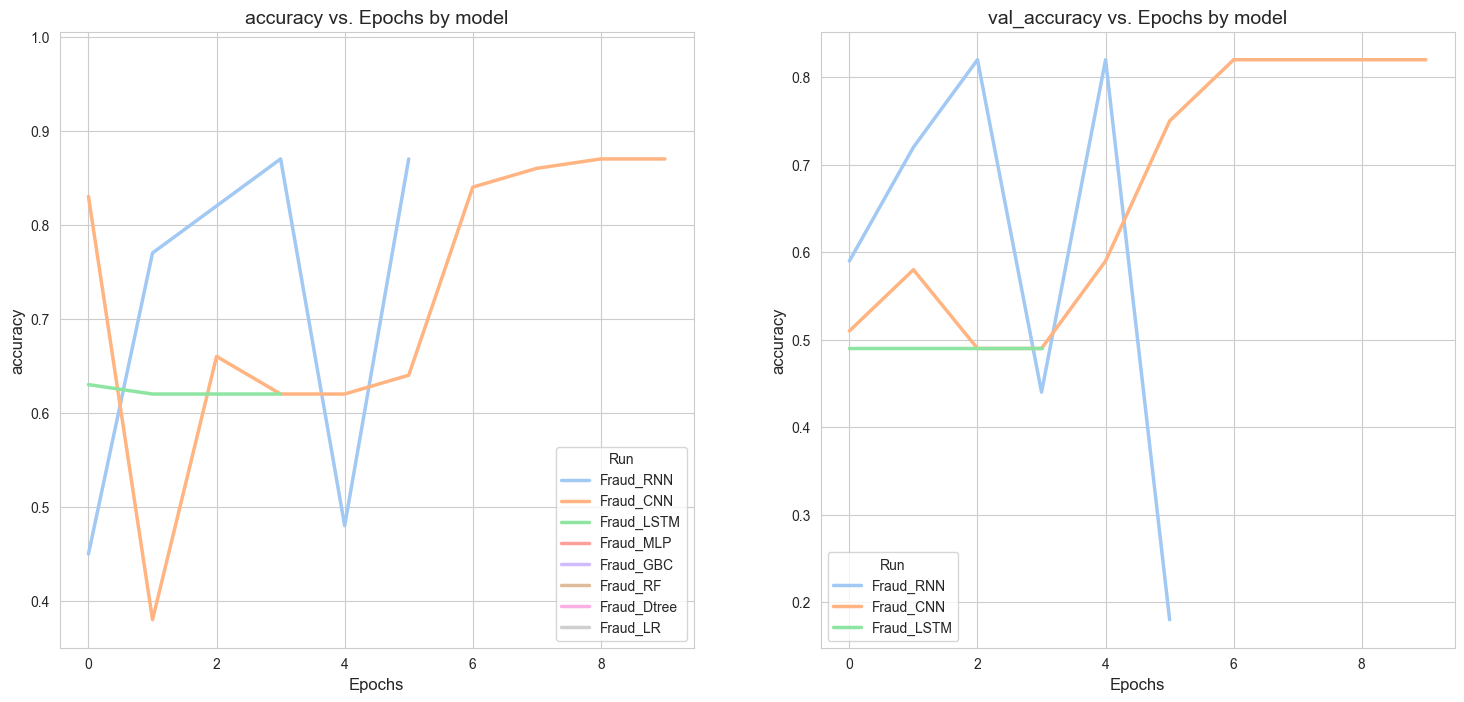

In [8]:
model_utils.plot_evaluate_neurons(False, 'accuracy')

**Analysis**
1. Accuracy vs. Epochs (Left Plot):
    - All models show some variation in accuracy across epochs, with some models improving and others declining.
    - Some models, like Fraud_RNN, Fraud_CNN show a general upward trend in accuracy, indicating they are learning from the training data.
    - Fraud_LSTM was not improving at all. 

2. Validation Accuracy vs. Epochs (Right Plot):
    - The validation accuracy plot gives a better indication of how well the models generalize to unseen data.
    - The Fraud_RNN, Fraud_CNN, and Fraud_LSTM models show a relatively stable validation accuracy, suggesting they are not overfitting.
    - The Fraud_RNN has a more volatile validation accuracy, indicating potential overfitting.


**Insight**
- Based on these plots, the Fraud_RNN, Fraud_CNN, and Fraud_LSTM models appear to be performing better than the other models, with more stable training and validation accuracy. The other models, particularly Fraud_MLP and Fraud_GBC, seem to be overfitting the training data, leading to lower validation accuracy.

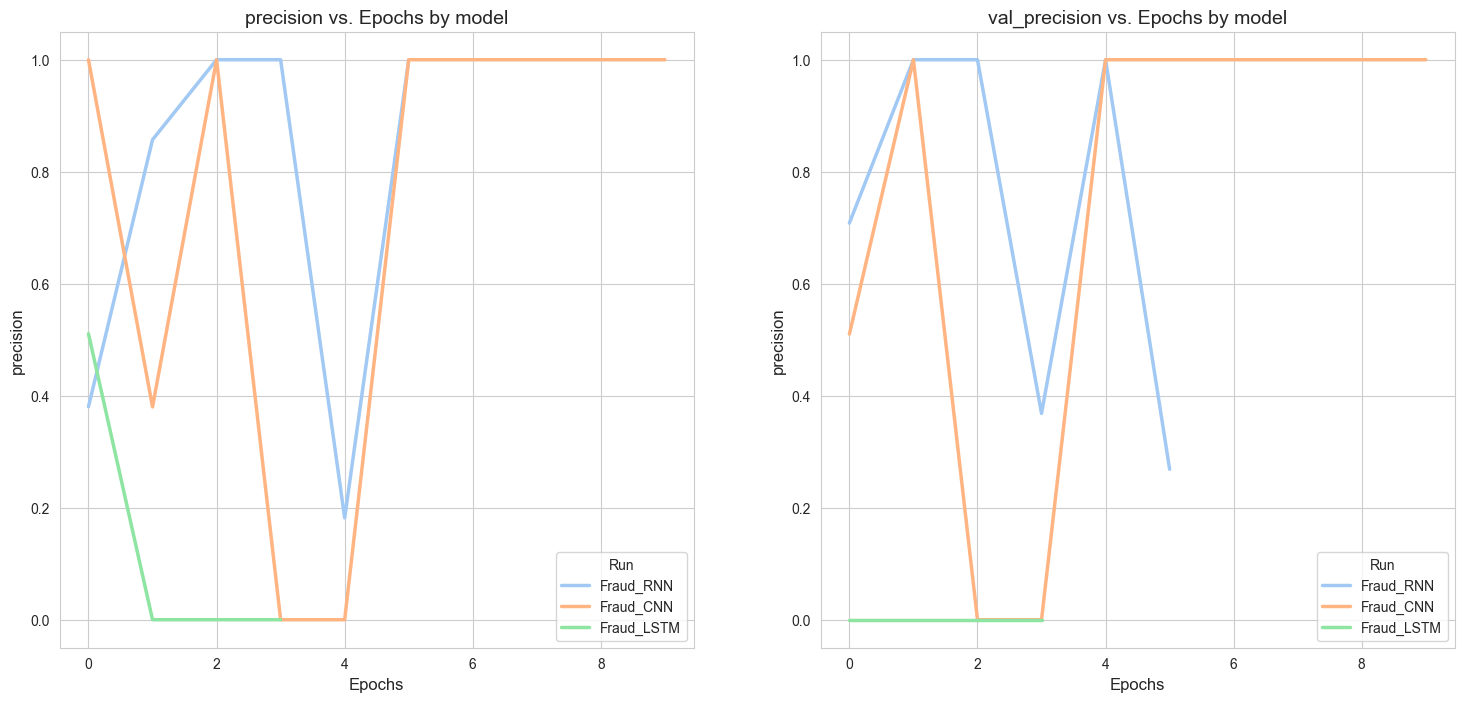

In [9]:
model_utils.plot_evaluate_neurons(False, 'precision')


**Analysis**

1. Precision vs. Epochs (Left Plot):
    - All three models show a rapid increase in precision during the initial epochs. This is expected as models learn to identify true positive instances more accurately.
    - The Fraud_RNN model reaches the highest precision, followed by Fraud_CNN

2. Validation Precision vs. Epochs (Right Plot):
    - Fraud_CNN and Fraud_RNN were fluctuating indicating that they might overfit.
    - The Fraud_LSTM model has the lowest validation precision, further confirming the overfitting issue.


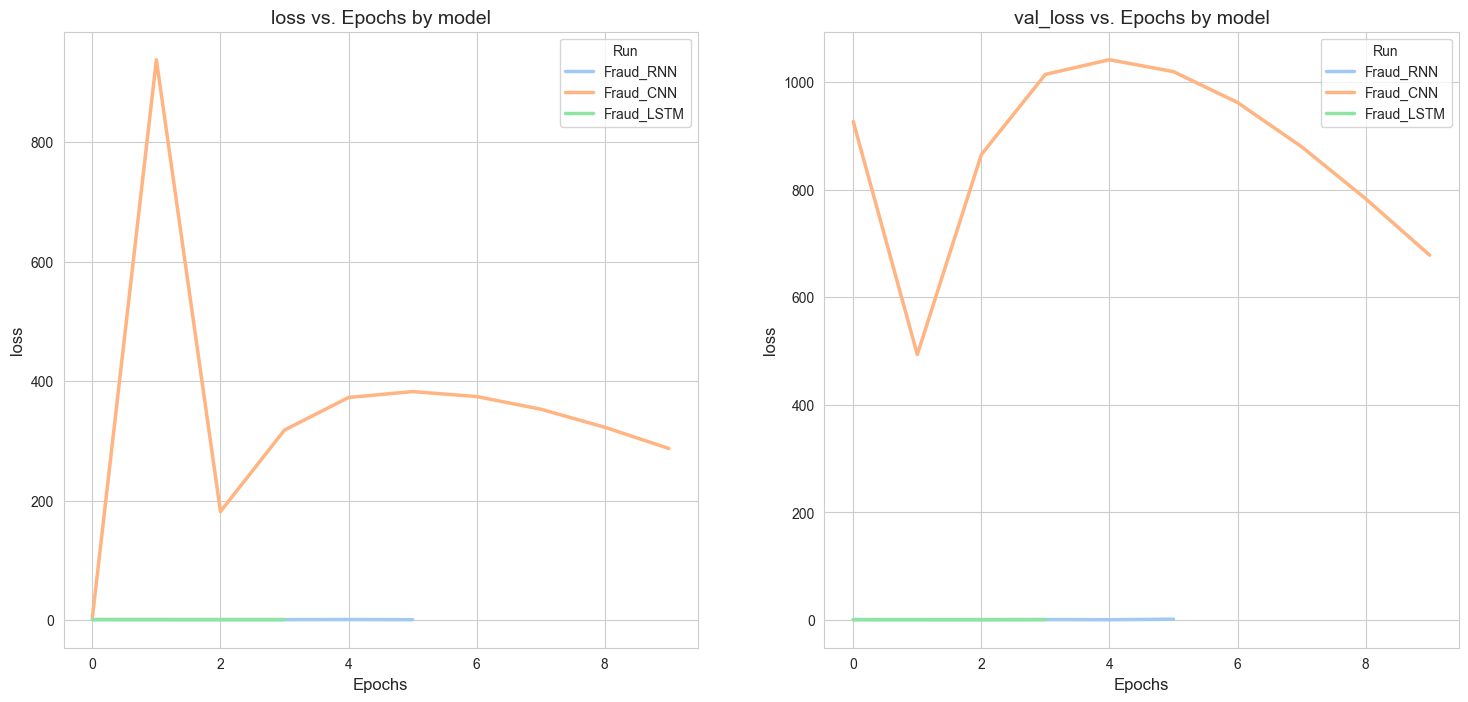

In [10]:
model_utils.plot_evaluate_neurons(False, 'loss')

**Observation**
- The loss for Fraud_CNN was decreasing showing that it is geralizing better than the other model.

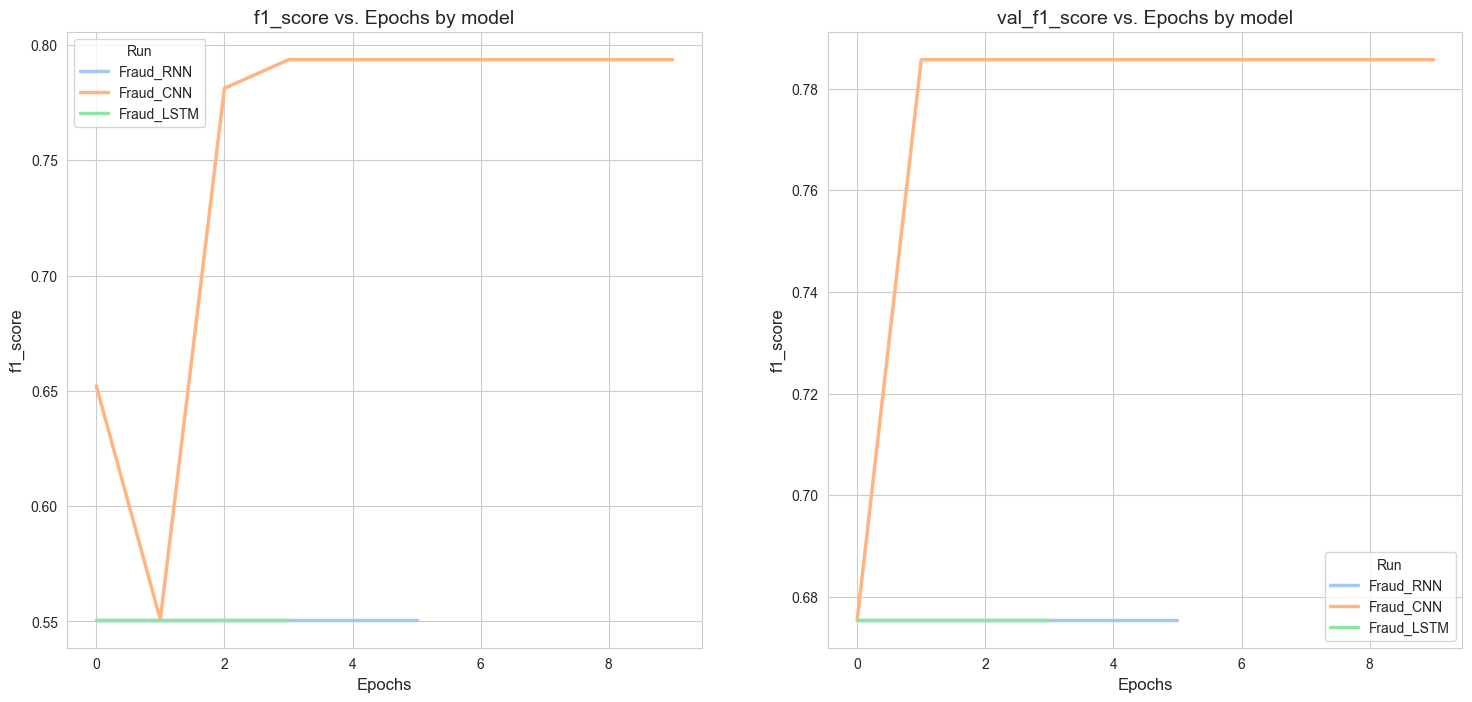

In [11]:
model_utils.plot_evaluate_neurons(False, 'f1_score')

**Observation**
- The loss for Fraud_CNN was increasing showing that it is geralizing better than the other model.

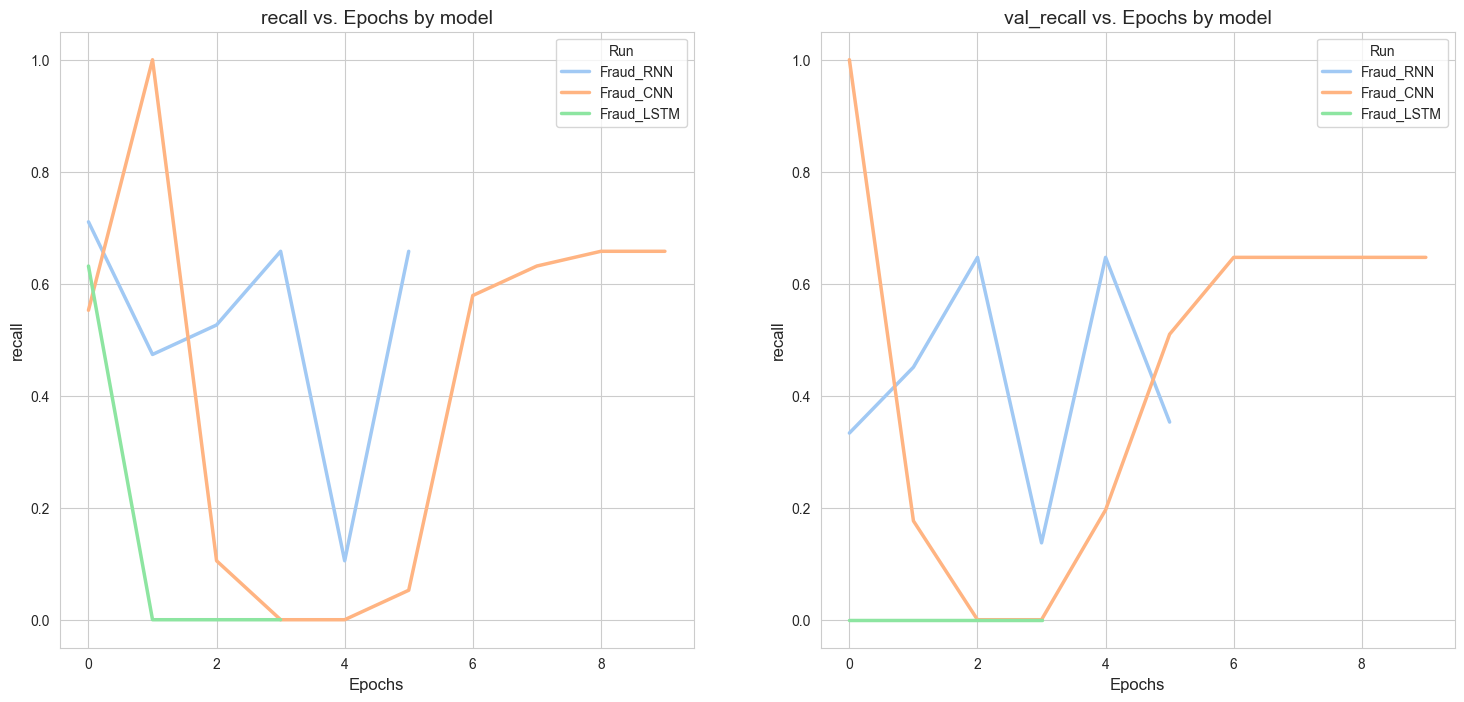

In [12]:
model_utils.plot_evaluate_neurons(False, 'recall')

**Analysis**
- The recall that was consistent for both training and validating is the Fraud_CNN model. Which shows that CNN is a better model for the credit card dataset.


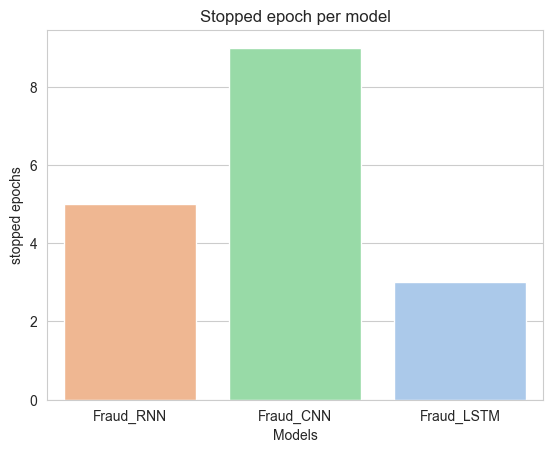

In [13]:
model_utils.plot_epochs(False)

**Analysis**
- It is visibible that CNN model was trained for longer epochs and overall CNN model showed good results.